# Wine Quality Prediction

-> Wine_Data  -> Data Pre-Processing  -> Training and Testing  ->Model ( Random Forest Model )  ->Trained Model ->New_Data ->Predict the Quality of Wine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_data=pd.read_csv("winequality-red.csv")

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data Analysis and Visualization 

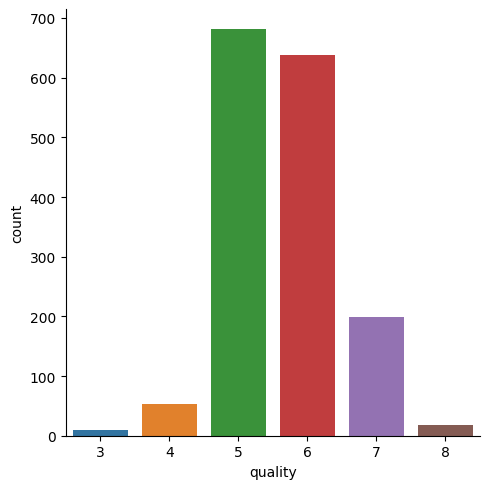

In [12]:
sns.catplot(wine_data,x='quality',kind='count')

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

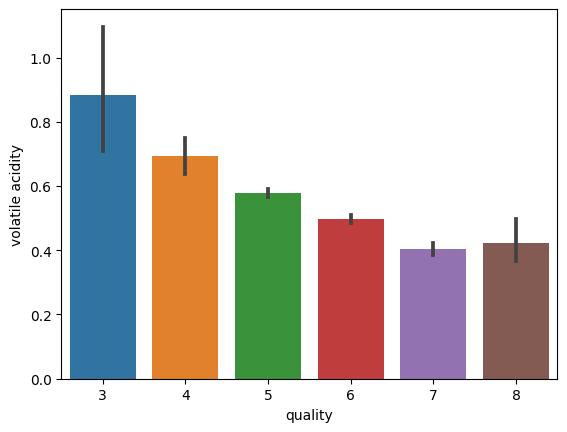

In [16]:
sns.barplot(wine_data,x='quality',y='volatile acidity')

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

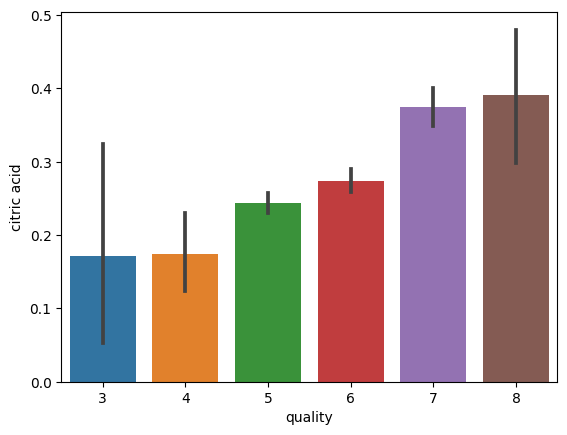

In [17]:
sns.barplot(wine_data,x='quality',y='citric acid')

<AxesSubplot: xlabel='quality', ylabel='chlorides'>

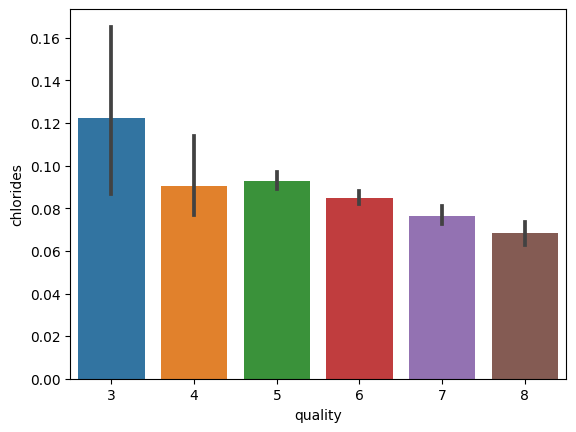

In [20]:
sns.barplot(wine_data,x='quality',y='chlorides')

<AxesSubplot: xlabel='quality', ylabel='free sulfur dioxide'>

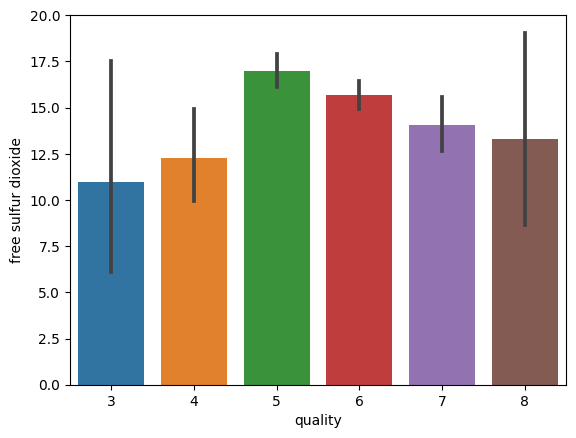

In [21]:
sns.barplot(wine_data,x='quality',y='free sulfur dioxide')

<AxesSubplot: xlabel='quality', ylabel='sulphates'>

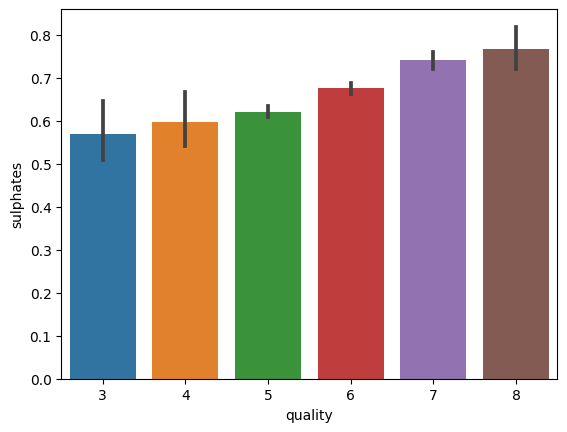

In [25]:
sns.barplot(wine_data,x='quality',y='sulphates')

<AxesSubplot: xlabel='quality', ylabel='alcohol'>

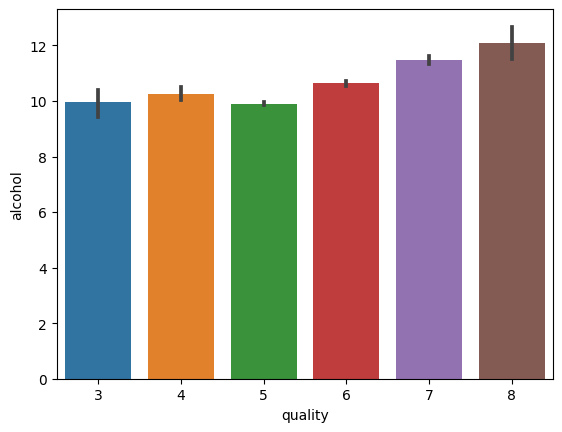

In [26]:
sns.barplot(wine_data,x='quality',y='alcohol')

## Now find the Correlation
- Positive correlation
- Negative correlation

In [28]:
#### Correlation help us for better understanding the relation between the columns

correlation=wine_data.corr()

In [29]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Now we are using the heatmap to find the correlation between the columns


<AxesSubplot: >

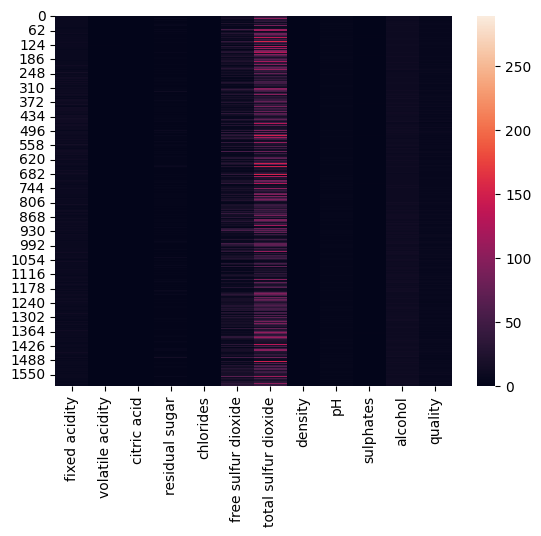

In [32]:
#### simple heatmap representation

sns.heatmap(wine_data)

<AxesSubplot: >

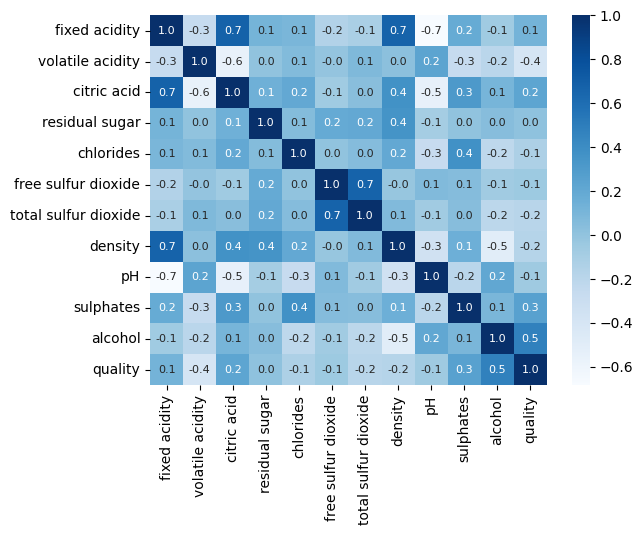

In [38]:
#### correlation heatmap visualization

#cbar=True show the side line for indication
#fmt='.1f' show the floating value and .1f means only one value after decimal 
#annot=Showing the values on the heatmap
#annot_size={'size':8} change the values size which is represented on heatmap
#cmap='Blues' change the colors into Blues Gradients 

sns.heatmap(correlation,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

## Data Pre-Processing


### Splitting the Data into the label and data

In [39]:
X=wine_data.iloc[:,:-1]
Y=wine_data.iloc[:,-1]

In [40]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [41]:
Y #### after getting seprate label then filter into 2 ouput (6 and below 6 are 0) and (above 6 will 1)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

## Label Binarization
- reduce the number of output (6 are the output) to print only two value 0 and 1
- below the number 7 the quality will be low like (3,4,5,6)
- and 7 and above the 7 will have the best quality like(7,8)

In [50]:
#### lambda is a function which holding a variable Y_value which have an condition if-else
#### the value of Y_value is 1 when the value is greater or equal to 7 and having 0 when less then 7

Y=wine_data['quality'].apply(lambda Y_value:1 if Y_value >=7 else 0)   

In [52]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Splitting the data into Training and Testing Data

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [58]:
print(X.shape,X_test.shape,X_train.shape)

(1599, 11) (320, 11) (1279, 11)


## Model Training

In [59]:
Random=RandomForestClassifier()

- feeding the data to the model and predict the output and find the accuracy

In [60]:
Random.fit(X_train,Y_train)
X_train_predict=Random.predict(X_train)
X_train_accuracy=accuracy_score(X_train_predict,Y_train)

In [61]:
print(X_train_accuracy)

1.0


- predict the output and find the accuracy of testing data

In [62]:
X_test_predict=Random.predict(X_test)
X_test_accuracy=accuracy_score(X_test_predict,Y_test)

In [63]:
print(X_test_accuracy)

0.95


## Prediction System

In [74]:
input_data=(8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
output_prediction=Random.predict(input_data_reshape)
print(output_prediction)

if output_prediction == 0:
    print("Low Quality Wine")
else:
    print("High Quality Wine")

[1]
High Quality Wine


C:\Users\Nishant Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [78]:
print(input_data)

(8.1, 0.38, 0.28, 2.1, 0.066, 13.0, 30.0, 0.9968, 3.23, 0.73, 9.7)


In [75]:
print(input_data_as_numpy_array)

[ 8.1     0.38    0.28    2.1     0.066  13.     30.      0.9968  3.23
  0.73    9.7   ]


In [77]:
print(input_data_reshape)

[[ 8.1     0.38    0.28    2.1     0.066  13.     30.      0.9968  3.23
   0.73    9.7   ]]


In [79]:
print(output_prediction)

[1]
